# 线性逻辑回归决策边界

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [2]:
x,y=make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=1024
)

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,stratify=y,random_state=233)
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [4]:
clf.score(x_train,y_train)

0.9357142857142857

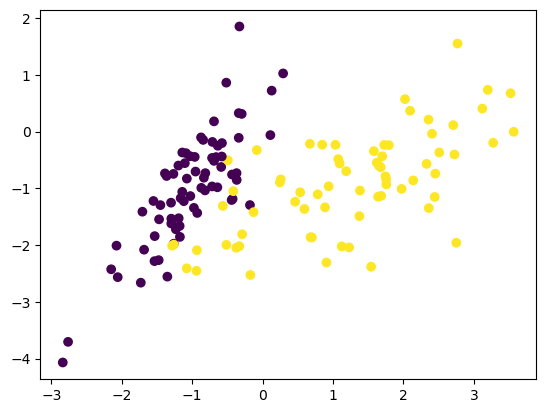

In [5]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [6]:
clf.coef_

array([[ 3.03124615, -1.81280807]])

In [7]:
clf.intercept_

array([-1.1307194])

## 决策边界,二维情况
$\dot y=g(w0+w1x1+w2x2)$,x=[1,x1,x2],w=[w0,w1,w2]

决策边界为$w0+w1x1+w2x2=0$

$x2=\frac{-w1x1-w0}{w2}=\frac{-w1}{w2}x1+\frac{-w1}{w2}$

In [8]:
x1=np.linspace(-4,4,1000)
x2=(-clf.coef_[0][0]*x1-clf.intercept_)/clf.coef_[0][1]

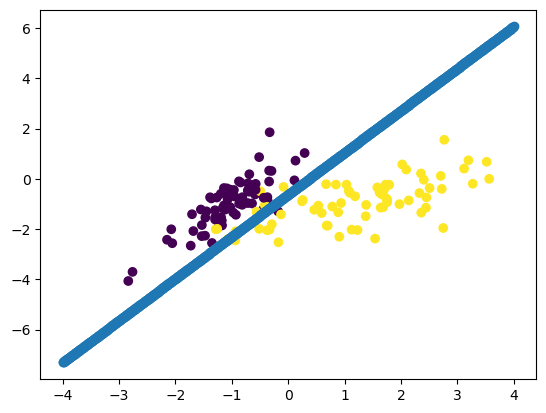

In [9]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.scatter(x1,x2)
plt.show()

# 决策边界绘制函数

In [10]:
def decision_boundary_plot(X,y,clf):
    axis_x1_min,axis_x1_max=X[:,0].min()-1,X[:,0].max()+1
    axis_x2_min,axis_x2_max=X[:,1].min()-1,X[:,1].max()+1
    x1,x2=np.meshgrid(np.arange(axis_x1_min,axis_x1_max,0.01),np.arange(axis_x2_min,axis_x2_max,0.01))
    z=clf.predict(np.c_[x1.ravel(),x2.ravel()])
    z=z.reshape(x1.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#F5B9EF','#FFFFFF','#F9F9CB'])
    plt.contourf(x1,x2,z,cmap=custom_cmap)
    plt.scatter(X[:,0],X[:,1],c=y)

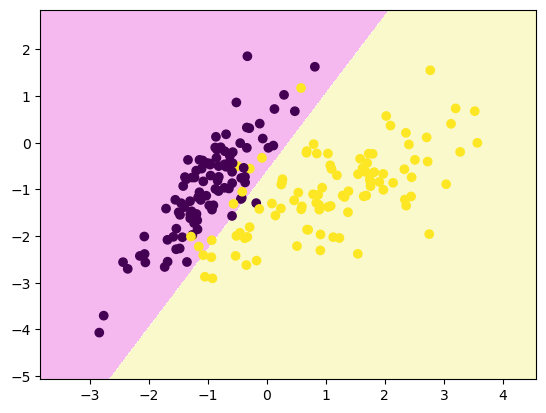

In [11]:
decision_boundary_plot(x,y,clf)

# 多分类决策边界

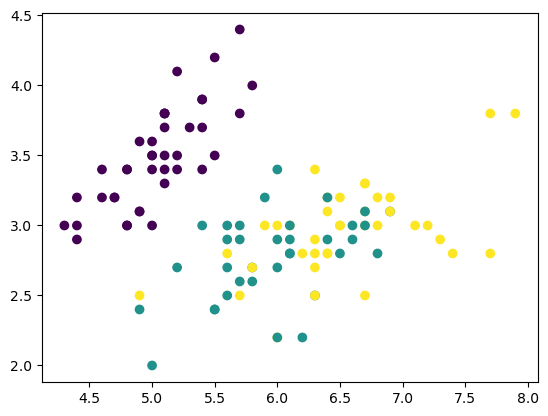

In [12]:
from sklearn import datasets
iris=datasets.load_iris()
x=iris.data[:,:2]
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=666)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [13]:
clf.fit(x_train,y_train)

LogisticRegression()

In [14]:
clf.score(x_test,y_test)

0.7894736842105263

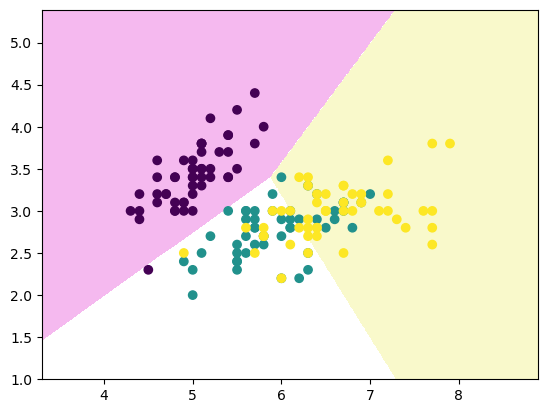

In [15]:
decision_boundary_plot(x,y,clf)

# 多项式逻辑回归决策边界

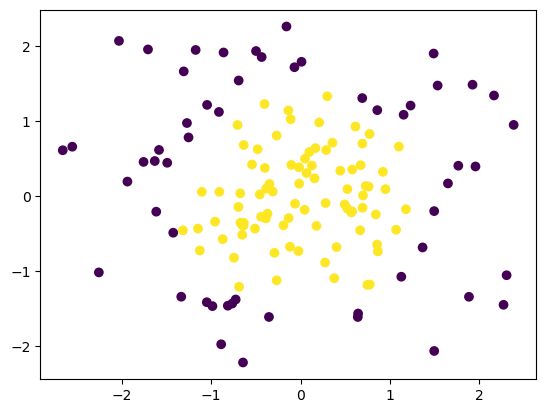

In [16]:
np.random.seed(0)
X=np.random.normal(0,1,size=(200,2))
y=np.array((X[:,0]**2)+(X[:,1]**2)<2,dtype='int')
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=233,stratify=y)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

## from sklearn.pipeline import Pipeline将许多算法模型或操作串联起来如特征提取，归一化

### [sklearn.pipeline import Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [18]:
clf_pipe=Pipeline([
       ('poly',PolynomialFeatures(degree=2)),#多项式特征提取模块
       ('std_scaler',StandardScaler()),#归一化模块
       ('log_reg',LogisticRegression()) #逻辑回归分类器
])

In [19]:
clf_pipe.fit(x_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

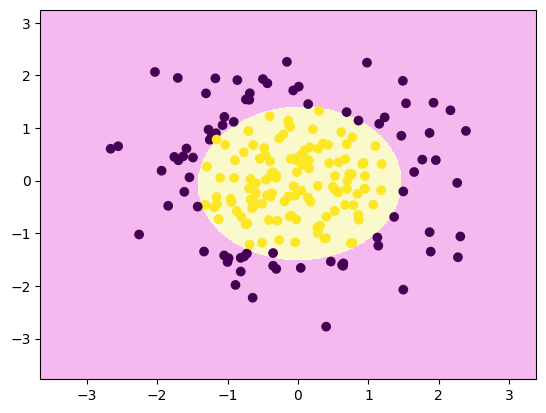

In [20]:
decision_boundary_plot(X,y,clf_pipe)